# METR3613: Meteorological Measurements, Dr. Scott Salesky 
## Making plots in Python with Matplotlib

One goal of the homework assignments in METR3613 is to give you the opportunity to work with real data and to explore some of the concepts of data quality control, errors in data, and data analysis. In order to visualize our results, we will have to prepare plots from the data. We will do this in Python using the Matplotlib package, a library for 2D and 3D graphical plotting. The goal of this notebook is to provide an introduction/review of Matplotlib and a reference for later use. 

## How to use this notebook

Because a Python notebook can be run in your browser, one cell at a time, you are encouraged to read through this notebook at your own pace and to make sure you understand the syntax of the examples below. One of the best ways to understand what the code does is to edit it and to change values of some of the variables and to define your own variables, functions, etc. So feel free to make this document your own and to try out writing code following the examples that are given below. 
***

# Matplotlib - plotting data in Python

In [233]:
#This line configures matplotlib to show figures embedded in the notebook. 
%matplotlib inline

### Introduction
Matplotlib is an excellent graphics library for generating scientific figures (I use it myself to create figures for scientific papers). Some of the advantages of the library include:
- Easy to get started
- Support for $\LaTeX$ labels and test
- Great control of figure properties
- Output to many formats including PNG, PDF, SVG, and EPS

In addition, matplotlib allows one to control aspects of a figure *programatically*. This means that you can write a script to generate a figure and reuse it when you need to regenerate the figure with updated data or change its appearance. 

More information can be found at the [Matplotlib website](http://matplotlib.org/)

To get started import the `matplotlib.pyplot` module under the name `plt`.

In [234]:
import matplotlib.pyplot as plt

In [235]:
import numpy as np

### A first example

In [236]:
#Create some arrays to plot
x = np.linspace(0,5,10)
y = x**2

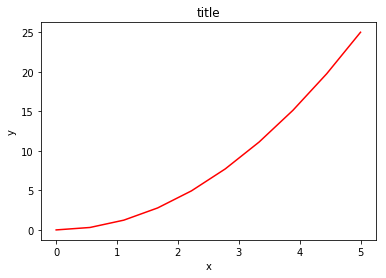

In [237]:
#Now create a figure and plot the data
plt.figure()
plt.plot(x,y,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

We can also create subplots in a Matplotlib figure. To do this, we just use the `plt.subplot(nrows,ncols,number)` command before plotting:

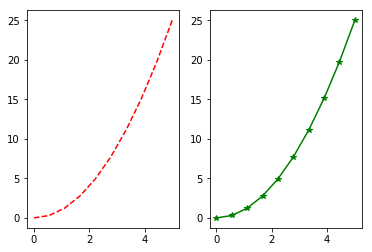

In [242]:
#Create plot in left panel
plt.subplot(1,2,1)
plt.plot(x,y,'r--')
#Create plot in right panel
plt.subplot(1,2,2)
plt.plot(x,y,'g*-')
plt.show()

### Objects and methods in matplotlib

While we will use Python for scientific purposes in this course (and it is well-suited for that purpose), it is an object oriented language. This means that the programming language has objects that one can apply functions and actions on. The advantage of this approach will be obvious when we want to create more than one figure or more than one subplot. 

To use this approach, we start out as in the previous example, but instead of creating a new global figure instance, we store a reference to the newly created figure in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method of `fig`:

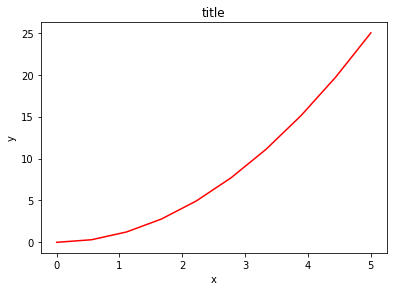

In [243]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) #left, bottom, width, height (range 0 to 1)

axes.plot(x,y,'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a bit more code is involved, we have full control over where the plot axes are placed, and we can add more than one axis to the figure easily:

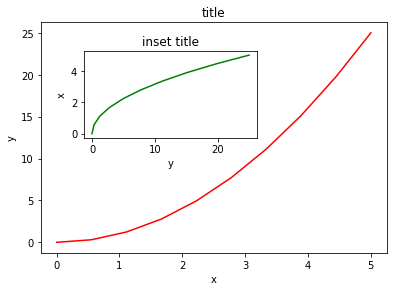

In [245]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# inset
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('inset title');

### Figure size, aspect ratio, and DPI

Matplotlib allows the aspect ratio, DPI, and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots per inch (which specifies the figure resolution). To create an 800x400 pixel, 100 dots per inch figure, we can do:

In [246]:
fig = plt.figure(figsize=(8,4),dpi=100)

<Figure size 800x400 with 0 Axes>

### Saving figures
To save a figure, we can use the `savefig` method

In [247]:
plt.savefig('filename.png')

<Figure size 432x288 with 0 Axes>

We can also specify the DPI and choose the output format

In [248]:
plt.savefig('filename.png',format='png')

<Figure size 432x288 with 0 Axes>

You can also specify the `bbox_inches="tight"` command to eliminate extra space on the edges of your plot. 

In [249]:
plt.savefig('filename.png',format='png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

### Legends, labels, and titles
Now that we know how to create a figure canvas and add axes, let's look at how to set the title, axis labels, and legends

#### Figure titles
A title can be added to each axis instance in a figure. To set the title, use the `plt.title` command.

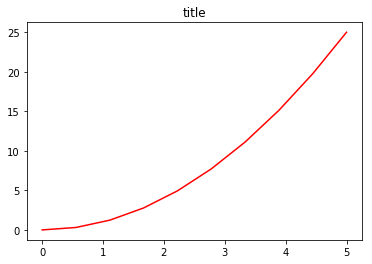

In [258]:
fig = plt.figure()
plt.plot(x, y, 'r')
plt.title("title");

Similarly, we can use the `plt.xlabel` and `plt.ylabel` commands to set labels for the x- and y- axes:

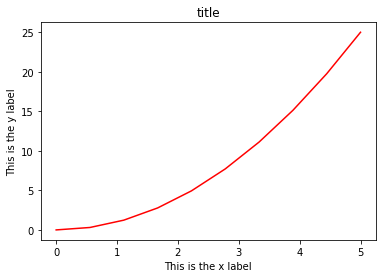

In [260]:
fig = plt.figure()
plt.plot(x, y, 'r')
plt.title("title");
plt.xlabel("This is the x label")
plt.ylabel("This is the y label");

#### Legends
Legends for curves in figures can be defined by include the `label="label text"` keyword argument when plots and other objects are added to the figure and then using the `plt.legend` command to add the legend to the figure. 

In [279]:
x = np.linspace(0,2.*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)

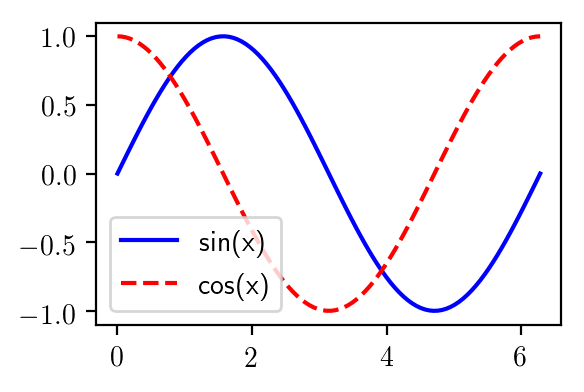

In [281]:
plt.figure(figsize=(3,2),dpi=200)

plt.plot(x,y1,'b-',label='sin(x)')
plt.plot(x,y2,'r--',label='cos(x)')
plt.legend()

The legend always takes the optional keyword argument `loc` to specify where we want the legend to be on the plot. For example:

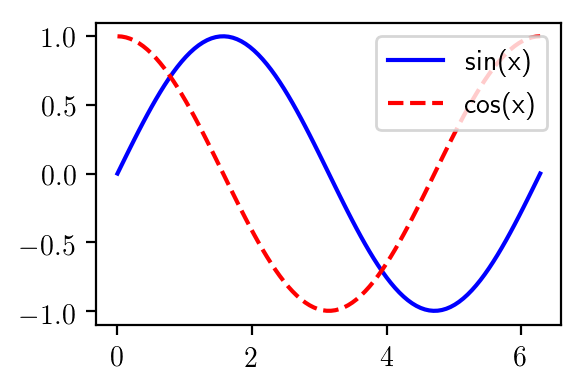

In [282]:
plt.figure(figsize=(3,2),dpi=200)

plt.plot(x,y1,'b-',label='sin(x)')
plt.plot(x,y2,'r--',label='cos(x)')
plt.legend(loc='upper right')

More infomation about including legends in Matplotlib plots can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html). 

### Using $\LaTeX\$ and formatting text

#### $\LaTeX$

Matplotlib also supports the use of $\LaTeX$ (LaTeX), which is a scientific typesetting package. LaTeX is used to typeset mathematical symbols and equations in scientific and mathematical writing. For more information, see the [LaTeX homepage](https://www.latex-project.org/) or the [LaTeX documentation](https://www.latex-project.org/help/documentation/). 

To use LaTeX in a Matplotlib plot, you will have to import the `rc` package from Matplotlib and set the `usetex=True`

In [261]:
from matplotlib import rc
rc('text',usetex='True')

Now we can use LaTeX symbols for the axis labels, plot title, and any annotations. Blocks of LaTex code are denoted by dollar signs `$...$`, and many symbols and Greek letters are preceeded by a backslash: `$\alpha$` produces $\alpha$, `$\int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$` produces $\int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, etc.

One thing to note is that when we include LaTeX formatting in a Matplotlib plot, we need to use *raw* strings (since the backslash `\` has a different meaning in LaTeX than in Python). We can do this by adding an `r` to the start of the strings that contain LaTeX commands: `r"this is a raw string"`.


An example in a Matplotlib plot:

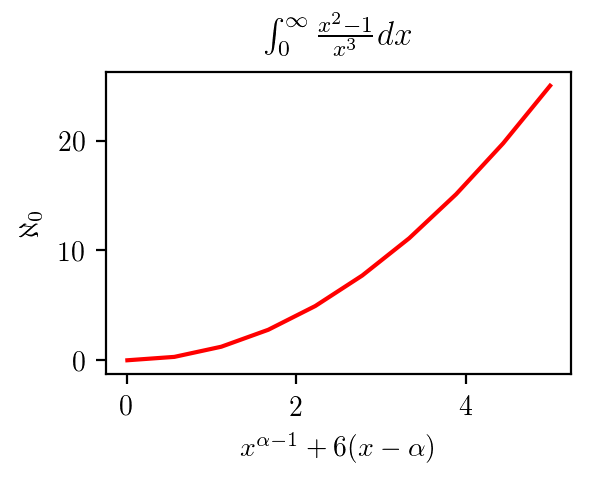

In [278]:
fig = plt.figure(figsize=(3,2),dpi=200)
plt.plot(x, y, 'r')
plt.title(r"$\int_{0}^\infty \frac{x^2 - 1}{x^3} dx$");
plt.xlabel(r"$x^{\alpha - 1} + 6(x-\alpha)$")
plt.ylabel(r"$\aleph_0$");

A LaTeX tutorial can be found [here](https://www.latex-tutorial.com/tutorials/), together with a list of how to typeset common [mathematical symbols](https://www.latex-tutorial.com/symbols/math-symbols/) and the [Greek alphabet](https://www.latex-tutorial.com/symbols/greek-alphabet/). 

#### Text formatting
We are also able to change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels, titles, legends, etc.)

In [286]:
from matplotlib import rc
rc('font',weight='normal',size=18,family='serif',serif='Computer Modern Roman')

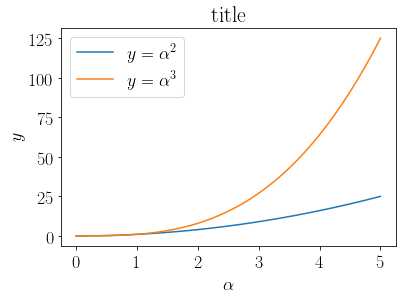

In [288]:
f1 = plt.plot(figsize=(3,2),dpi=200)

x = np.linspace(0,5,100)

plt.plot(x, x**2, label=r"$y = \alpha^2$")
plt.plot(x, x**3, label=r"$y = \alpha^3$")
plt.legend(loc='upper left') # upper left corner
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$y$')
plt.title('title');

### Setting colors, linewidths, linestypes
#### Colors
With matplotlib, we can define the colors of lines and other graphic elements. First, we can use the MATLAB-like syntax, where `b` means blue, `g` means green, etc. The MATLAB-like interfact for selecting line styles is also supported, where for example `'b-.'` means a blue line with dots.

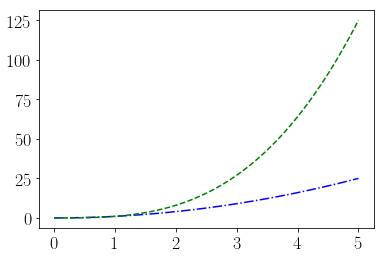

In [291]:
f1 = plt.plot(figsize=(3,2),dpi=200)

plt.plot(x, x**2, 'b-.') #Blue line with dots
plt.plot(x, x**3, 'g--') #Green dashed line

We can also define colors by their names or RGB hex codes and provide an alpha value (making them partially transparent) using the `color` and `alpha` keyword arguments:

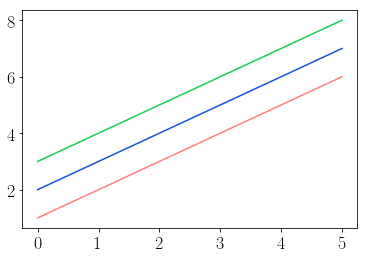

In [292]:
f1 = plt.plot(figsize=(3,2),dpi=200)

plt.plot(x, x+1, color="red", alpha=0.5) #half-transparent red
plt.plot(x, x+2, color="#1155dd") #RGB hex code for a bluish color
plt.plot(x, x+3, color="#15cc55") #RGB hex code for a greenish color

#### Line and marker styles
To change the linewidth, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

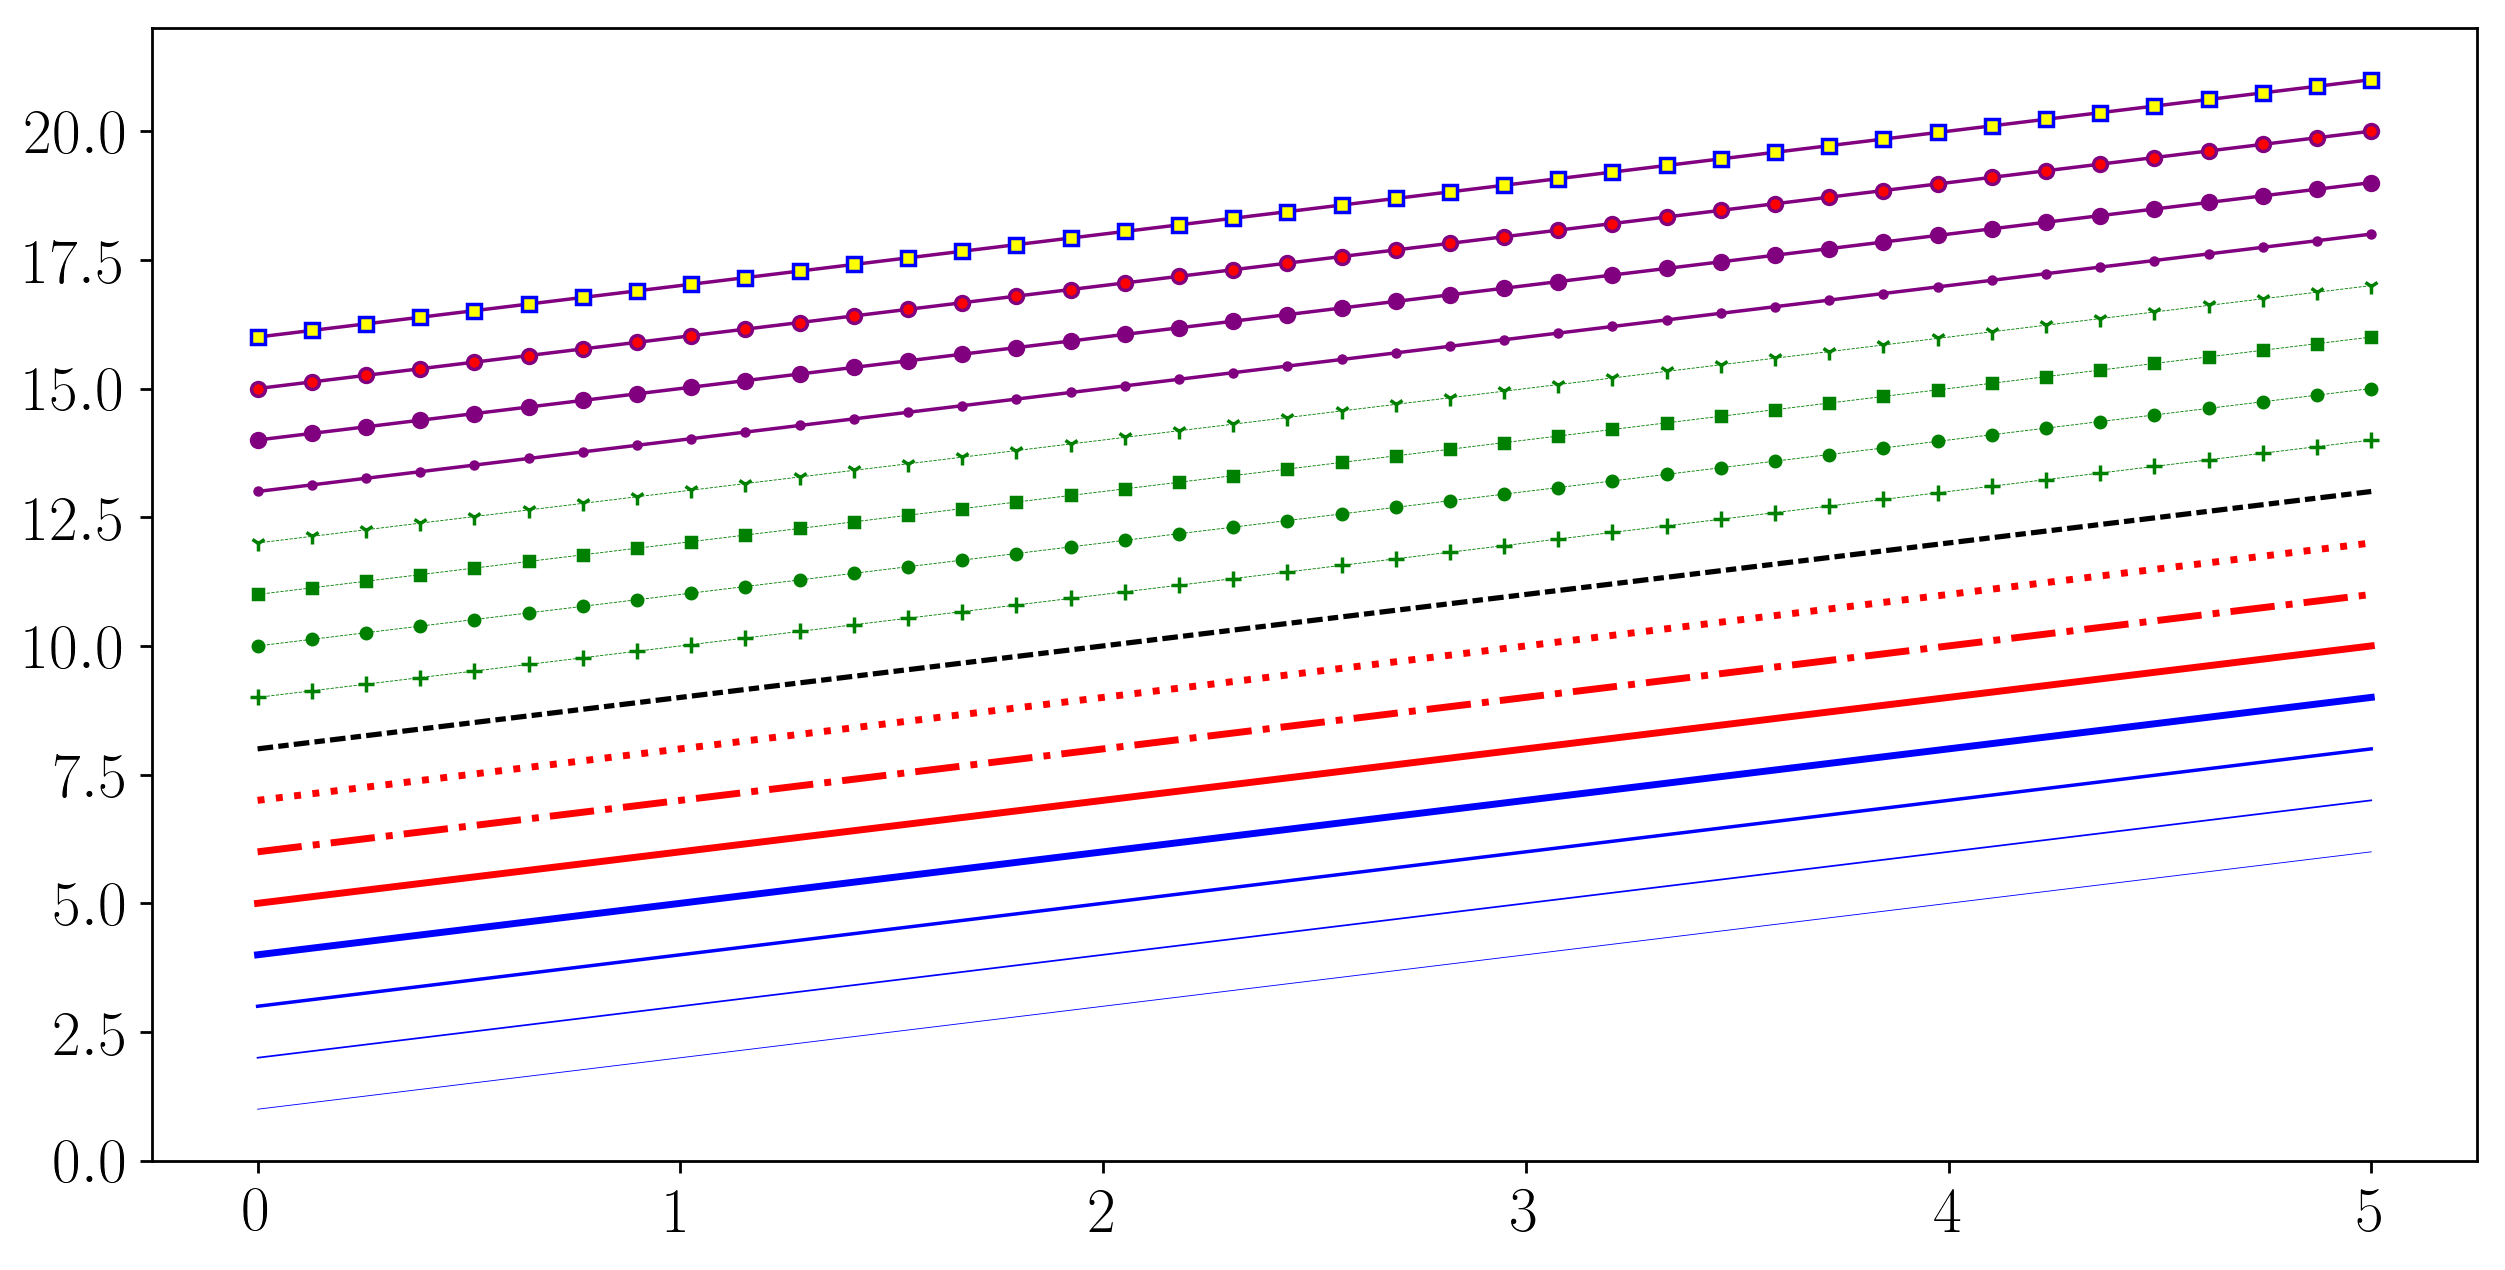

In [311]:
x = np.linspace(0,5,40)

f1 = plt.figure(figsize=(12,6),dpi=250)

plt.plot(x, x+1, color="blue", linewidth=0.25)
plt.plot(x, x+2, color="blue", linewidth=0.50)
plt.plot(x, x+3, color="blue", linewidth=1.00)
plt.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
plt.plot(x, x+5, color="red", lw=2, linestyle='-')
plt.plot(x, x+6, color="red", lw=2, ls='-.')
plt.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
plt.plot(x,x+8, color="black", lw=1.5, dashes=(3,1,2,1))

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
plt.plot(x, x+ 9, color="green", lw=0.25, ls='--', marker='+',markersize=4.5)
plt.plot(x, x+10, color="green", lw=0.25, ls='--', marker='o',markersize=3)
plt.plot(x, x+11, color="green", lw=0.25, ls='--', marker='s',markersize=3)
plt.plot(x, x+12, color="green", lw=0.25, ls='--', marker='1',markersize=4.5)

# marker size and color
plt.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
plt.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
plt.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=4, markerfacecolor="red")
plt.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=4, markerfacecolor="yellow", markeredgewidth=1, markeredgecolor="blue")

### Customizing axis appearance
The appears of the axes is an important aspect of the figure we often need to modify when making publication-quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range
The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

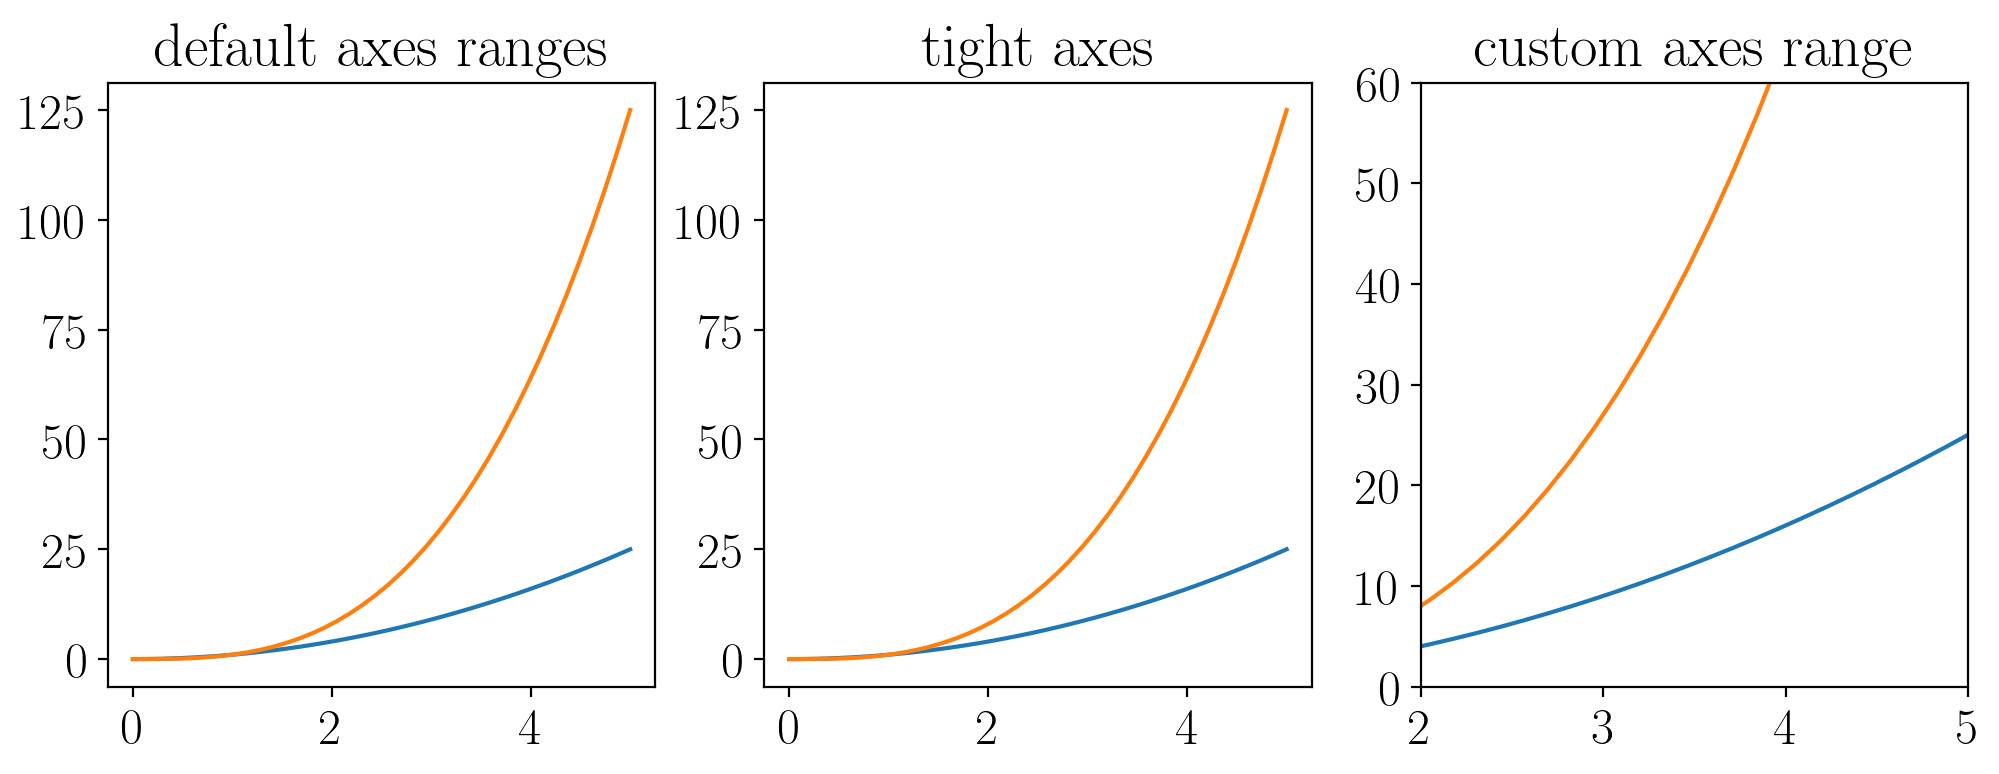

In [314]:
fig = plt.figure(figsize=(12,4),dpi=200)

plt.subplot(1,3,1)
plt.plot(x, x**2, x, x**3)
plt.title("default axes ranges")

plt.subplot(1,3,2)
plt.plot(x, x**2, x, x**3)
s1.axis('tight')
plt.title("tight axes")

plt.subplot(1,3,3)
plt.plot(x, x**2, x, x**3)
plt.ylim([0, 60])
plt.xlim([2, 5])
plt.title("custom axes range");

#### Logarithmic scale
It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

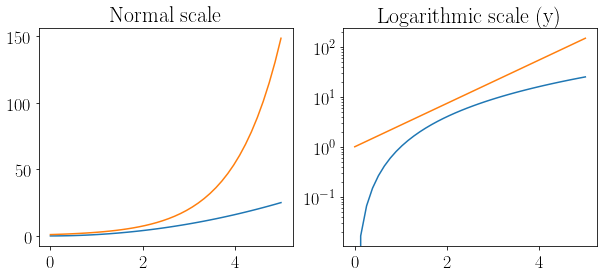

In [315]:
fig = plt.figure(figsize=(10,4))
      
s1 = plt.subplot(1,2,1)
plt.plot(x, x**2, x, np.exp(x))
plt.title("Normal scale")

s2 = plt.subplot(1,2,2)
plt.plot(x, x**2, x, np.exp(x))
s2.set_yscale("log")
plt.title("Logarithmic scale (y)");

#### Axis grid
With the `grid` method, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the plot function:

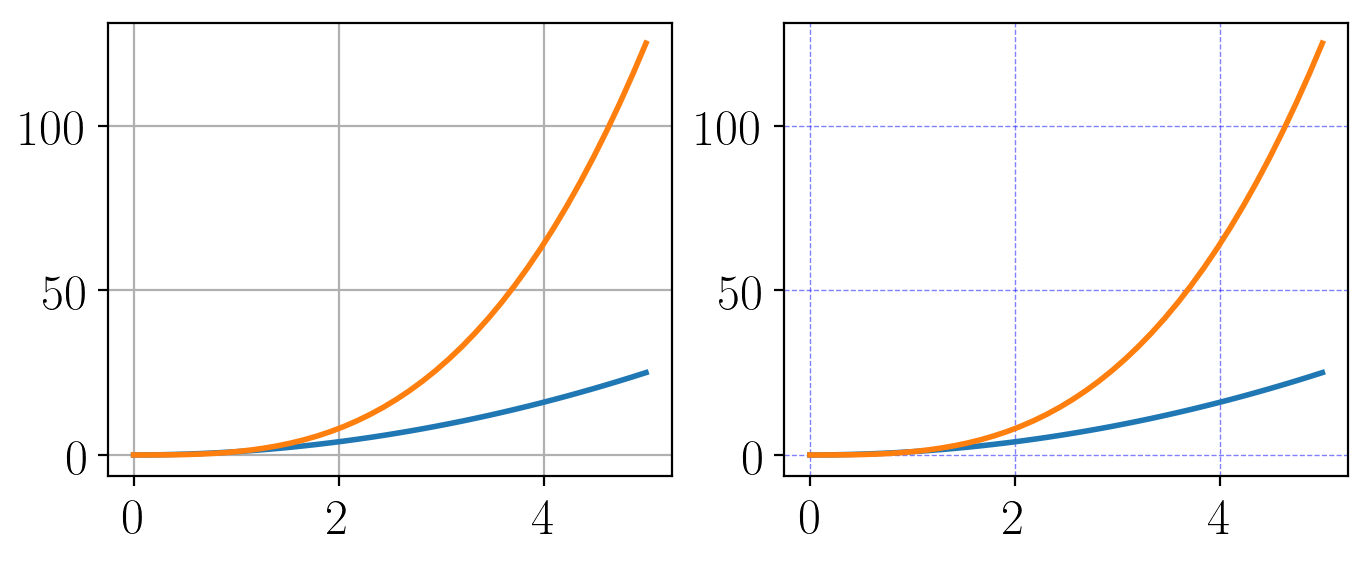

In [325]:
fig = plt.figure(figsize=(8,3),dpi=200)

# default grid appearance
plt.subplot(1,2,1)
plt.plot(x, x**2, x, x**3, lw=2)
plt.grid(True)

plt.subplot(1,2,2)
# custom grid appearance
plt.plot(x, x**2, x, x**3, lw=2)
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

#### Twin axes
Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

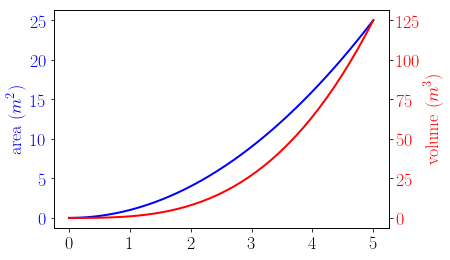

In [327]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

## Further reading

- (http://www.matplotlib.org) - The project webpage for matplotlib. 
- (http://www.matplotlib.org/gallery.html) - A large gallery with different types of plots that Matplotlib can create. Very useful!
- (http://www.loria.fr/~rougier/teaching/matplotlib) - A good matplotlib tutorial. 
- (http://www.scipy-lectures.org/matplotlib/matplotlib.html) - Another useful tutorial. 